In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-whitegrid")

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

myLoc = MultipleLocator(14)
myFmt = DateFormatter("%d/%m")


In [2]:
nokia = pd.read_csv("nokia_data.csv", sep = ";", decimal = ",", skiprows = 1)
nokia.head()
#omat alkavat

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-10-07,4.483,4.485,4.400,4.502,4.377,4.478,4.456,11587790,5.163156e+07,7332,NaN
1,2019-10-04,4.421,4.424,4.419,4.444,4.385,4.426,4.416,12338480,5.448378e+07,9245,NaN
2,2019-10-03,4.400,4.402,4.402,4.415,4.322,4.395,4.383,11885012,5.209612e+07,10208,NaN
3,2019-10-02,4.403,4.406,4.494,4.504,4.386,4.400,4.418,18019157,7.960330e+07,11014,NaN
4,2019-10-01,4.479,4.482,4.650,4.655,4.461,4.495,4.523,22712017,1.027383e+08,14316,NaN


In [3]:
nokia = pd.read_csv("nokia_data.csv", sep = ";", decimal = ",", skiprows = 1)
nokia.index = pd.to_datetime(nokia["Date"])
nokia.sort_index(inplace=True)
nokia.drop(["Date"], axis=1, inplace=True) #jos ei ole esim. nokia = nokia.drop jne. niin tarvitaan inplace
nokia.head()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,
2019-09-06,4.527,4.529,4.494,4.544,4.487,4.535,4.527,10075412,45606919.23,6722,NaN
2019-09-09,4.524,4.526,4.550,4.580,4.515,4.534,4.542,9646192,43812490.77,6897,NaN
2019-09-10,4.546,4.549,4.550,4.562,4.498,4.562,4.544,13572905,61674217.32,9006,NaN
2019-09-11,4.593,4.596,4.600,4.640,4.577,4.612,4.608,15108846,69618857.63,10956,NaN
2019-09-12,4.690,4.693,4.622,4.698,4.618,4.682,4.670,14802064,69119658.95,9399,NaN


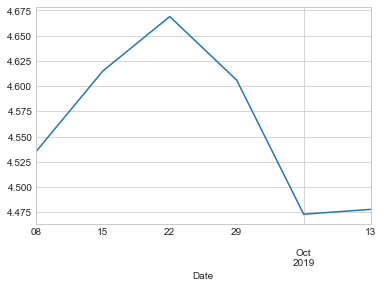

In [4]:
nokia["Closing price"].resample("W").mean().plot()

In [5]:
sanoma = pd.read_csv("sanoma.csv", sep = ";", decimal = ",", skiprows = 1)
sanoma.index = pd.to_datetime(sanoma["Date"])
sanoma.sort_index(inplace=True)
sanoma = sanoma.drop(["Date"], axis=1)

sanoma.head()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,
2019-09-06,9.495,9.530,9.235,9.565,9.235,9.510,9.419,54626,514537.15,340,NaN
2019-09-09,9.585,9.605,9.505,9.605,9.455,9.600,9.537,33783,322205.82,315,NaN
2019-09-10,9.625,9.700,9.600,9.660,9.420,9.620,9.495,69903,663702.37,204,NaN
2019-09-11,9.445,9.475,9.340,9.630,9.340,9.475,9.516,19127,182004.00,178,NaN
2019-09-12,9.340,9.400,9.505,9.505,9.205,9.345,9.346,25588,239126.11,224,NaN


In [6]:
alma = pd.read_csv("almamedia.csv", sep = ";", decimal = ",", skiprows = 1)
alma.index = pd.to_datetime(alma["Date"])
alma.sort_index(inplace=True)
alma = alma.drop(["Date"], axis=1)
alma.head()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,
2019-09-06,6.32,6.36,6.44,6.44,6.32,6.32,6.376,11357,72410.84,81,NaN
2019-09-09,6.30,6.32,6.32,6.48,6.30,6.32,6.335,17481,110748.74,67,NaN
2019-09-10,6.26,6.32,6.38,6.38,6.26,6.26,6.308,11522,72674.47,84,NaN
2019-09-11,6.32,6.34,6.32,6.36,6.30,6.34,6.337,11236,71159.17,66,NaN
2019-09-12,6.34,6.40,6.38,6.40,6.30,6.40,6.329,10590,67022.20,43,NaN


In [7]:
symbols = ['sTrades', 'aTrades']

kaupat = pd.concat([sanoma["Trades"], alma["Trades"]], axis=1)
kaupat.columns = symbols
kaupat.head()

,sTrades,aTrades
Date,,
2019-09-06,340,81
2019-09-09,315,67
2019-09-10,204,84
2019-09-11,178,66
2019-09-12,224,43


In [8]:
kaupat.describe()

,sTrades,aTrades
count,22.000000,22.000000
mean,292.045455,71.545455
std,160.788378,28.598580
min,124.000000,30.000000
25%,193.500000,51.250000
50%,252.500000,66.000000
75%,305.500000,83.250000
max,815.000000,158.000000


In [9]:
kaupat[(abs(kaupat["sTrades"])>100) &(abs(kaupat["aTrades"])>100)]

,sTrades,aTrades
Date,,
2019-09-16,815,117
2019-09-17,494,101
2019-10-04,124,158


In [10]:
kaupat["Weekday"] = kaupat.index.weekday  #pvm:n weekday-omin.
kaupat.groupby("Weekday")["sTrades"].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,5.0,340.80,271.165448,164.0,190.00,220.0,315.00,815.0
1,4.0,275.00,147.542084,175.0,196.75,215.5,293.75,494.0
2,4.0,255.00,57.002924,178.0,230.50,267.0,291.50,308.0
3,4.0,249.75,55.331576,184.0,214.00,258.5,294.25,298.0
4,5.0,320.40,183.600926,124.0,257.00,263.0,340.00,618.0


In [11]:
kaupat["Weekday"] = kaupat.index.weekday  #pvm:n weekday-omin.
kaupat.groupby("Weekday")["aTrades"].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,5.0,74.60,28.005357,45.0,58.00,67.0,86.00,117.0
1,4.0,81.75,15.326991,64.0,74.50,81.0,88.25,101.0
2,4.0,59.75,28.871843,30.0,42.00,56.0,73.75,97.0
3,4.0,58.75,11.586630,43.0,54.25,61.0,65.50,70.0
4,5.0,80.00,45.820301,46.0,49.00,66.0,81.00,158.0


In [12]:
kaupat.corr()

,sTrades,aTrades,Weekday
sTrades,1.000000,0.143701,-0.059747
aTrades,0.143701,1.000000,-0.041851
Weekday,-0.059747,-0.041851,1.000000


In [13]:
kaupat.corr().drop(index="Weekday", columns="Weekday")


,sTrades,aTrades
sTrades,1.000000,0.143701
aTrades,0.143701,1.000000


In [14]:
kaupat.drop(["Weekday"], axis=1).head()

,sTrades,aTrades
Date,,
2019-09-06,340,81
2019-09-09,315,67
2019-09-10,204,84
2019-09-11,178,66
2019-09-12,224,43


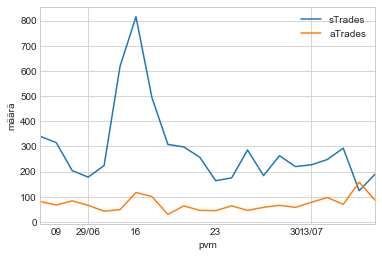

In [15]:
kaupat1=kaupat.drop(["Weekday"], axis=1)
kaupat1.head()

ax2 =kaupat1.plot()
ax2.set_ylabel("määrä")
ax2.set_xlabel("pvm")
ax2.xaxis.set_major_locator(myLoc)
ax2.xaxis.set_major_formatter(myFmt)